**Project 1 - Spill Incidents in Connecticut**
-------------------------------------------------------------------------
**Dr. Carlos Cardonha - OPIM 5641: Business Decision Modeling - University of Connecticut**

Group 5$:$ 
* Akshay Kumar Pydi
* Bhanu Sai Teja Guduri 
* Cedric Wong
* Lily Abarbanel
* Monica Lingan
* Youngkyun Kwon


## **Summary**

The CT Spill incidents data set represents information reported to the Department of Energy and Environmental Protection (CT DEEP), generally to the CT DEEP Dispatch Center, regarding releases of substances to the environment, mostly through accidental spills. In this Project we will be showing details about 2 important aspects: 

* Exploratory Data Analysis on the CT Spill Incidents provided by CT DEEP
* Assignment of Crews to 3 cities Danbury, Middletown and Naugatuck using Brute Force Method as per the given Problem Statement.

## **Import Modules**

In [ ]:
# importing modules required for the Project
import pandas as pd # for data wrangling
import numpy as np # for array calculations, some math functions
from matplotlib import pyplot as plt # for plotting
import seaborn as sns

# **Read Data**

The dataset that was being used here is the CT Spill Incident data which has all the historical data till date. For the part of our Exploratory analysis we will be filtering the data for all cities and using the 2021 data to draw valuable insights.

* Dataset - https://data.ct.gov/Environment-and-Natural-Resources/Spill-Incidents/wr2a-rnsg
* Drive Source - https://drive.google.com/file/d/1bhc3s3kVYtnhXMlhNhoaxjae2BxIlHt1/view?usp=sharing

In [ ]:
# We decided to go with the csv file as we wanted more data for our exploration
# Step 1: copy & paste the shared link you will get from Google Drive
URL = 'https://drive.google.com/file/d/1bhc3s3kVYtnhXMlhNhoaxjae2BxIlHt1/view?usp=sharing'

# Step 2: copy & paste the command below (this part of the command is fixed)
fixed_path = 'https://drive.google.com/uc?export=download&id='

# Step 3: Extract the file ID from the URL (this part of the command is fixed)
file_path = URL.split('/')[-2]

# Retrieve the CSV data and build a dataframe
df_full = pd.read_csv(fixed_path + file_path)

# Number of lines and columns
print(df_full.shape)

# Renaming the columns of Dataset so as to access them clearly and to understand Easily
df_full.rename(columns={'Year' :  'year',
                        'Case No.' :  'caseno',
                        'Assigned to' :  'assignedto',
                        'Date Reported Time Reported' :  'date_reported_time_reported',
                        'Release date and time' :  'releasedatetime',
                        'Town of Release' :  'townrelease', 
                        'State of Release' :  'stateofrelease', 
                        'Reported By' :  'reportedby', 
                        'Representing' :  'representing',
                        'Responsibile Party/Discharger' :  'discharger',
                        'Responsible Party Address' :  'location', 
                        'Responsible Party Town' :  'reptown',
                        'Responsible Party State' :  'repstate',
                        'Responsible Party Zip' :  'repzip', 
                        'Responsible Party Accepts Responsibility (Y/N)' :  'responsibility',
                        'Location Of Reported Release' :  'repstreet',
                        'Release Type' :  'releasetype',
                        'Release Substance' :  'releasesubstance',
                        'Total Quantity Gallons' :  'quangallons',
                        'Total Quantity Yards' :  'quanyards',
                        'Total Quantity Feet' :  'quanfeet',
                        'Total Quantity Drums' :  'quandrums', 
                        'Total Quantity Pounds' :  'quanlbs', 
                        'Emergency Measures' :  'emergencymeasures',
                        'Type of Waterbody Affected' :  'waterbody', 
                        'Waterbodies Affected' :  'waterbodiesaffected',
                        'Corrective Actions Taken' :  'actions',
                        'Cause Info' :  'causeinfo', 'Media Info' :  'mediainfo'}, inplace=True)

df =pd.DataFrame(df_full) 
df =df[df["year"] == 2021] # Filtering the data for the year 2021
print(df.shape) # Checking the Shape of Dataset
print(df.head()) # Checking the first 5 rows of the dataset

(193869, 29)
(3958, 29)
        year     caseno  ...               causeinfo       mediainfo
189060  2021  202100014  ...             MV Accident  Ground Surface
189065  2021  202100004  ...             MV Accident  Ground Surface
189068  2021  202100021  ...  Other (pad mount leak)  Ground Surface
189076  2021  202100026  ...       Container Failure  Ground Surface
189083  2021  202100013  ...             MV Accident  Ground Surface

[5 rows x 29 columns]


# **Data Preparation**


In this section, we will be analysing all the columns of the dataset and checking the missing values. We will also look for any data type conversions if required.

In [ ]:
# check the info of this dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 189060 to 193868
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year                         3958 non-null   int64 
 1   caseno                       3958 non-null   int64 
 2   assignedto                   3958 non-null   object
 3   date_reported_time_reported  3958 non-null   object
 4   releasedatetime              3958 non-null   object
 5   townrelease                  3949 non-null   object
 6   stateofrelease               3958 non-null   object
 7   reportedby                   3956 non-null   object
 8   representing                 3953 non-null   object
 9   discharger                   1394 non-null   object
 10  location                     347 non-null    object
 11  reptown                      334 non-null    object
 12  repstate                     3957 non-null   object
 13  repzip                    

There are a total of 3958 records of the CT Spill incident dataset for the year 2021 and we will work on scrapping important columns from this.

In [ ]:
# check the shape
print(df.shape)

(3958, 29)


### **Exploring Missing Values**

In this section, we will be exploring on missing values in various columns and then come to a decision to include, exclude or Impute those columns.

In [ ]:
# check missing values by column
df.isnull().sum()

year                              0
caseno                            0
assignedto                        0
date_reported_time_reported       0
releasedatetime                   0
townrelease                       9
stateofrelease                    0
reportedby                        2
representing                      5
discharger                     2564
location                       3611
reptown                        3624
repstate                          1
repzip                         3637
responsibility                 3844
repstreet                         9
releasetype                       0
releasesubstance                 14
quangallons                       6
quanyards                         0
quanfeet                          0
quandrums                         1
quanlbs                           0
emergencymeasures               825
waterbody                      3234
waterbodiesaffected            3543
actions                         186
causeinfo                   

We see that there are many columns having most of the data as NULL. Hence, these columns will be removed from further analysis.

In [ ]:
# drop the column with most number of missing values
df.drop(['waterbody','discharger','location','waterbodiesaffected','responsibility','repstreet','reptown','repzip', 'emergencymeasures','actions','causeinfo','mediainfo'],
        axis=1, inplace=True)

In [ ]:
# check the shape
print(df.shape) # check the shape
print(df.isnull().sum()) # After dropping Null values analysis

(3958, 17)
year                            0
caseno                          0
assignedto                      0
date_reported_time_reported     0
releasedatetime                 0
townrelease                     9
stateofrelease                  0
reportedby                      2
representing                    5
repstate                        1
releasetype                     0
releasesubstance               14
quangallons                     6
quanyards                       0
quanfeet                        0
quandrums                       1
quanlbs                         0
dtype: int64


In [ ]:
# Remove the data where townrelease is NULL as its very important to know the city of Spill incident
nan_value = float("NaN")
#Convert NaN values to empty string
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["townrelease"], inplace=True)

In [ ]:
print(df.shape)
print(df.isnull().sum()) # after deletion of nine rows, below is the information of the dataset.

(3949, 17)
year                           0
caseno                         0
assignedto                     0
date_reported_time_reported    0
releasedatetime                0
townrelease                    0
stateofrelease                 0
reportedby                     0
representing                   5
repstate                       1
releasetype                    0
releasesubstance               5
quangallons                    6
quanyards                      0
quanfeet                       0
quandrums                      1
quanlbs                        0
dtype: int64


### **Data Cleaning**

We see that the Quangallons (quantity in gallons) is having the data in a string format with various prelimilary text before the numbers. So, in this section we will be working on cleaning this columns data and converting into a number format i.e, float

In [ ]:
# check the unique values in quangallons
# there are some symbols in the data with object datatype
df['quangallons'].unique()

array(['5.00', '~      2.00', '2.00', '<      6.00', '1.00',
       '<      1.00', '0.00', '~      1.00', '<     10.00', '4.00',
       '<      5.00', '<      3.00', '3.00', '<      4.00', '10.00',
       '~     10.00', '~      5.00', '~      3.00', '<      2.00', '0.25',
       '0.01', '~     50.00', '0.10', '~     30.00', '~     35.00',
       '8.00', '0.50', '<     30.00', nan, '1.25', '~      4.00',
       '100.00', '<      7.00', '~      2.50', '20.00', '16.00', '35.00',
       '<      0.25', '~     20.00', '25.00', '~      0.00', '200.00',
       '0.75', '150.00', '15.00', '~    100.00', '~    150.00', '0.15',
       '<     20.00', '~      8.00', '<     15.00', '24.00', '30.00',
       '<     55.00', '~      7.00', '175.00', '12.00', '1000.00',
       '40.00', '<     70.00', '500.00', '<      8.00', '250.00', '50.00',
       '55.00', '~    250.00', '1200.00', '33.00', '~     16.00',
       '+     10.00', '~     15.00', '<      0.01', '<    100.00',
       '+    200.00', '~     18

In [ ]:
# since the symbols limits the function of this variable
# we will get rid of the symbols <, >, ~ & +
df['quangallons'] =df['quangallons'].str.replace("<","")
df['quangallons'] =df['quangallons'].str.replace("~","")
df['quangallons'] =df['quangallons'].str.replace("+","")
df['quangallons'] =df['quangallons'].str.replace(">","")
df['quangallons'] =df['quangallons'].str.strip()
df.head() # show the first 5 rows

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs
189060,2021,202100014,NO Response,01/03/2021 07:50:00 PM,01/03/2021 06:38:00 PM,Easton,CT,29,FD,CT,petroleum,GASOLINE,5.00,0.00,0.00,0.00,0.00
189065,2021,202100004,NO Response,01/01/2021 04:28:00 PM,01/01/2021 12:00:00 AM,Middlefield,CT,dispatch,valley shore,CT,petroleum,TRANSMISSION OIL,2.00,0.00,0.00,0.00,0.00
189068,2021,202100021,NO Response,01/04/2021 10:02:00 AM,01/04/2021 12:00:00 AM,Guilford,CT,aaron niderno,ESE,CT,dielect,TRANSFORMER OIL,2.00,0.00,0.00,0.00,0.00
189076,2021,202100026,NO Response,01/04/2021 01:25:00 PM,01/04/2021 12:00:00 AM,WATERFORD,CT,mike dowger,XL environmental,CT,petroleum,HYDRAULIC OIL,2.00,0.00,0.00,0.00,0.00
189083,2021,202100013,NO Response,01/03/2021 01:04:00 PM,01/03/2021 12:41:00 PM,FRANKLIN,CT,Ring,FD,CT,petroleum,MIXED MOTOR VEHICLE FLUIDS,6.00,0.00,0.00,0.00,0.00


In [ ]:
# now convert the datatype of 'quangallons' to numeric
df['quangallons'] = pd.to_numeric(df['quangallons'])
df.info() # we have a dataset with 3949 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3949 entries, 189060 to 193868
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         3949 non-null   int64  
 1   caseno                       3949 non-null   int64  
 2   assignedto                   3949 non-null   object 
 3   date_reported_time_reported  3949 non-null   object 
 4   releasedatetime              3949 non-null   object 
 5   townrelease                  3949 non-null   object 
 6   stateofrelease               3949 non-null   object 
 7   reportedby                   3949 non-null   object 
 8   representing                 3944 non-null   object 
 9   repstate                     3948 non-null   object 
 10  releasetype                  3949 non-null   object 
 11  releasesubstance             3944 non-null   object 
 12  quangallons                  3943 non-null   float64
 13  quanyards  

In [ ]:
# check missing values by column again
df.isnull().sum()

year                           0
caseno                         0
assignedto                     0
date_reported_time_reported    0
releasedatetime                0
townrelease                    0
stateofrelease                 0
reportedby                     0
representing                   5
repstate                       1
releasetype                    0
releasesubstance               5
quangallons                    6
quanyards                      0
quanfeet                       0
quandrums                      1
quanlbs                        0
dtype: int64

In [ ]:
# drop the missing values
df.dropna(axis = 0 , inplace = True)

In [ ]:
# confirm no missing values
df.isnull().sum()

year                           0
caseno                         0
assignedto                     0
date_reported_time_reported    0
releasedatetime                0
townrelease                    0
stateofrelease                 0
reportedby                     0
representing                   0
repstate                       0
releasetype                    0
releasesubstance               0
quangallons                    0
quanyards                      0
quanfeet                       0
quandrums                      0
quanlbs                        0
dtype: int64

In [ ]:
df.shape
# we have a clean dataset with 3931 rows and 17 columns

(3931, 17)

In [ ]:
df.head()

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs
189060,2021,202100014,NO Response,01/03/2021 07:50:00 PM,01/03/2021 06:38:00 PM,Easton,CT,29,FD,CT,petroleum,GASOLINE,5.0,0.00,0.00,0.00,0.00
189065,2021,202100004,NO Response,01/01/2021 04:28:00 PM,01/01/2021 12:00:00 AM,Middlefield,CT,dispatch,valley shore,CT,petroleum,TRANSMISSION OIL,2.0,0.00,0.00,0.00,0.00
189068,2021,202100021,NO Response,01/04/2021 10:02:00 AM,01/04/2021 12:00:00 AM,Guilford,CT,aaron niderno,ESE,CT,dielect,TRANSFORMER OIL,2.0,0.00,0.00,0.00,0.00
189076,2021,202100026,NO Response,01/04/2021 01:25:00 PM,01/04/2021 12:00:00 AM,WATERFORD,CT,mike dowger,XL environmental,CT,petroleum,HYDRAULIC OIL,2.0,0.00,0.00,0.00,0.00
189083,2021,202100013,NO Response,01/03/2021 01:04:00 PM,01/03/2021 12:41:00 PM,FRANKLIN,CT,Ring,FD,CT,petroleum,MIXED MOTOR VEHICLE FLUIDS,6.0,0.00,0.00,0.00,0.00


### **Recoding the Categorical Variable**

In this section, we will be converting the releasetype column data to an ordinal variable for further analyzing the data in a better manner.

In [ ]:
# check the count of each unique value
df['releasetype'].value_counts()

petroleum                               2143
chemical                                 718
dielect                                  400
petroleum, and chemical                  328
not specified                             86
                                        ... 
other (CONTAMINATED SOIL)                  1
other (sand)                               1
other (NONE)                               1
other (none)                               1
petroleum, and chemical, and dielect       1
Name: releasetype, Length: 73, dtype: int64

In [ ]:
# recoding release type column
# group all others in one category

# 9 represents mixed substances
# 10 represents others

grades = [1,2,3,4,5,6,7,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
release_type = ["petroleum", # 1
                "chemical", # 2
                "dielect", # 3
                "biomedical", # 4
                "sewage related", # 5
                "hazardous waste", # 6
                "gas emission", # 7
                "not specified", # 8
                "petroleum, and chemical, and dielect", # 9
                "petroleum, and dielect", # 9
                "chemical, and hazardous waste", # 9
                "petroleum, and biomedical", # 9
                "petroleum, and other (milk)", # 9
                "chemical, and biomedical", # 9
                "petroleum, and chemical, and dielect, and hazardous waste, and sewage related, and gas emission", # 9
                "chemical, and dielect", # 9
                "dielect, and gas emission", # 9
                "chemical, and other (water)", # 9
                "chemical, and other (WATER)", # 9
                "petroleum, and other (water with fuel oil)", # 9
                "petroleum, and chemical", # 9
                "petroleum, and chemical, and other (water)", # 9
                "petroleum, and gas emission", # 9
                "other (UNKNOWN)", # 10
                "other (WATER)", # 10
                "other (ASBESTOS)", # 10
                "other (liquid sugar)", # 10
                "other (CONSTRUCTION MATERIALS)", # 10
                "other (environmentally friendly engine coolent)", # 10
                "other (wheelchair batteries / mv fire)", # 10
                "other (NONE)", # 10
                "other (unkjnown)", # 10
                "other (Water to extinguish brush fire)", # 10
                "other (None)", # 10
                "other (waste water / slurry)", # 10
                "other (paint)", # 10
                "other (explosives waste)", # 10
                "other (Olive Oil)", # 10
                "other (COMPRESSOR OIL (FOOD GRADE))", # 10
                "other (soil)", # 10
                "other (latex paint)", # 10
                "other (UNKNOWN ODOR)", # 10
                "other (Unknow)", # 10
                "other (Asbestos)", # 10
                "other (asbestos/lead)", # 10
                "other (Molasses)", # 10
                "other (slurry)", # 10
                "other (rocksalt)", # 10
                "other (none)", # 10
                "other (circulation water)", # 10
                "other (urea 50% solution)", # 10
                "other (unknown mv fluids)", # 10
                "other (waste water 2990 mg)", # 10
                "other (REVERSE OSMOSIS WATER & DIATOMACEOUS EAR)", # 10
                "other (garbage)", # 10
                "other (Stormwater)", # 10
                "other (Liquid Propane)", # 10
                "other (paper and water)", # 10
                "other (RESDIUAL WATER)", # 10
                "other (unknown)", # 10
                "other (water)", # 10
                "other (unk)", # 10
                "other (diatomaceous earth)", # 10
                "other (white powder)", # 10
                "other (CONTAMINATED SOIL)", # 10
                "other (no release)", # 10
                "other (sand)", # 10
                "other (none showing)", # 10
                "other (asbestos)", # 10
                "other (waste water)", # 10
                "other (wood)", # 10
                "other (STORM WATER)", # 10
                "other (SOIL)", # 10
                "other (Unknown)", # 10
                "other (Water)"] # 10

# replace with the new number to each category
df['releasetype'].replace(release_type, grades, inplace=True)

In [ ]:
# check the count of each value again
df['releasetype'].value_counts()

1     2143
2      718
3      400
9      352
10     108
8       86
5       44
6       42
7       35
4        3
Name: releasetype, dtype: int64

### **Transforming and feature engineering of the Time Series Data**

In this section, we will be transforming date_reported_time_reported column details to Time format. Then, we will be extracting the Day, Month, hour and time of occurance to have a better understanding on the occurance of the events in CT.

In [ ]:
# convert it to the right format to show date and time
df['date_reported_time_reported'] = pd.to_datetime(df.date_reported_time_reported)[:-3]
df.head() # show the first 5 rows

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs
189060,2021,202100014,NO Response,2021-01-03 19:50:00,01/03/2021 06:38:00 PM,Easton,CT,29,FD,CT,1,GASOLINE,5.0,0.00,0.00,0.00,0.00
189065,2021,202100004,NO Response,2021-01-01 16:28:00,01/01/2021 12:00:00 AM,Middlefield,CT,dispatch,valley shore,CT,1,TRANSMISSION OIL,2.0,0.00,0.00,0.00,0.00
189068,2021,202100021,NO Response,2021-01-04 10:02:00,01/04/2021 12:00:00 AM,Guilford,CT,aaron niderno,ESE,CT,3,TRANSFORMER OIL,2.0,0.00,0.00,0.00,0.00
189076,2021,202100026,NO Response,2021-01-04 13:25:00,01/04/2021 12:00:00 AM,WATERFORD,CT,mike dowger,XL environmental,CT,1,HYDRAULIC OIL,2.0,0.00,0.00,0.00,0.00
189083,2021,202100013,NO Response,2021-01-03 13:04:00,01/03/2021 12:41:00 PM,FRANKLIN,CT,Ring,FD,CT,1,MIXED MOTOR VEHICLE FLUIDS,6.0,0.00,0.00,0.00,0.00


In [ ]:
# since this is time series data
# we will use feature engineering to extract some new variables from the datatime variable
# these variables include date, month, hour, day and weekday
df['Date'] = df['date_reported_time_reported'].dt.date # extract the Date
df['Month'] = df['date_reported_time_reported'].dt.month # extract the Month
df['Hour'] = df['date_reported_time_reported'].dt.hour # extract the Hour
df['Day'] = df['date_reported_time_reported'].dt.day # extract the Day
df['Weekday'] = df['date_reported_time_reported'].dt.dayofweek # extract the Weekday
df.head()

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs,Date,Month,Hour,Day,Weekday
189060,2021,202100014,NO Response,2021-01-03 19:50:00,01/03/2021 06:38:00 PM,Easton,CT,29,FD,CT,1,GASOLINE,5.0,0.00,0.00,0.00,0.00,2021-01-03,1.0,19.0,3.0,6.0
189065,2021,202100004,NO Response,2021-01-01 16:28:00,01/01/2021 12:00:00 AM,Middlefield,CT,dispatch,valley shore,CT,1,TRANSMISSION OIL,2.0,0.00,0.00,0.00,0.00,2021-01-01,1.0,16.0,1.0,4.0
189068,2021,202100021,NO Response,2021-01-04 10:02:00,01/04/2021 12:00:00 AM,Guilford,CT,aaron niderno,ESE,CT,3,TRANSFORMER OIL,2.0,0.00,0.00,0.00,0.00,2021-01-04,1.0,10.0,4.0,0.0
189076,2021,202100026,NO Response,2021-01-04 13:25:00,01/04/2021 12:00:00 AM,WATERFORD,CT,mike dowger,XL environmental,CT,1,HYDRAULIC OIL,2.0,0.00,0.00,0.00,0.00,2021-01-04,1.0,13.0,4.0,0.0
189083,2021,202100013,NO Response,2021-01-03 13:04:00,01/03/2021 12:41:00 PM,FRANKLIN,CT,Ring,FD,CT,1,MIXED MOTOR VEHICLE FLUIDS,6.0,0.00,0.00,0.00,0.00,2021-01-03,1.0,13.0,3.0,6.0


In [ ]:
# show the actual name of weekday
df['Weekday_Name'] = df['Weekday']
replace_map = {'Weekday_Name': {0 :'Monday', 1 :'Tuesday', 2: 'Wednesday', 3:'Thursday', 4: 'Friday', 5 :'Saturday', 6: 'Sunday'}} # creating a dictionary
df.replace(replace_map, inplace = True) # replacing week numbers with week days
df.head()

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs,Date,Month,Hour,Day,Weekday,Weekday_Name
189060,2021,202100014,NO Response,2021-01-03 19:50:00,01/03/2021 06:38:00 PM,Easton,CT,29,FD,CT,1,GASOLINE,5.0,0.00,0.00,0.00,0.00,2021-01-03,1.0,19.0,3.0,6.0,Sunday
189065,2021,202100004,NO Response,2021-01-01 16:28:00,01/01/2021 12:00:00 AM,Middlefield,CT,dispatch,valley shore,CT,1,TRANSMISSION OIL,2.0,0.00,0.00,0.00,0.00,2021-01-01,1.0,16.0,1.0,4.0,Friday
189068,2021,202100021,NO Response,2021-01-04 10:02:00,01/04/2021 12:00:00 AM,Guilford,CT,aaron niderno,ESE,CT,3,TRANSFORMER OIL,2.0,0.00,0.00,0.00,0.00,2021-01-04,1.0,10.0,4.0,0.0,Monday
189076,2021,202100026,NO Response,2021-01-04 13:25:00,01/04/2021 12:00:00 AM,WATERFORD,CT,mike dowger,XL environmental,CT,1,HYDRAULIC OIL,2.0,0.00,0.00,0.00,0.00,2021-01-04,1.0,13.0,4.0,0.0,Monday
189083,2021,202100013,NO Response,2021-01-03 13:04:00,01/03/2021 12:41:00 PM,FRANKLIN,CT,Ring,FD,CT,1,MIXED MOTOR VEHICLE FLUIDS,6.0,0.00,0.00,0.00,0.00,2021-01-03,1.0,13.0,3.0,6.0,Sunday


Also, We will be creating elapsed time columns by subtracting releasedatetime from date_reported_time_reported so that we can confirm how long the incidents take to be reported after they happen.

In [ ]:
# create new column 'elapsed_time' by subtracing releasedatetime from date_reported_time_reported
# convert them to datetime to calculate
df['date_reported_time_reported'] = pd.to_datetime(df['date_reported_time_reported'])
df['releasedatetime'] = pd.to_datetime(df['releasedatetime'])

df['elapsed_time'] = df['date_reported_time_reported'] - df['releasedatetime'] # how long it takes from the time incident occured to when it was reported

In [ ]:
df.reset_index(drop=True,inplace=True) # reset the indice to use range function properly

df['elapsed_time_min'] = 0 # create new column 'elapsed_time_min'

# use for loop to convert the time data of each to minutes
for i in range(0,len(df)):
  df['elapsed_time_min'][i] = df['elapsed_time'][i].seconds / 60 # timedelta has no minutes attributes so use seconds

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs,Date,Month,Hour,Day,Weekday,Weekday_Name,elapsed_time,elapsed_time_min
0,2021,202100014,NO Response,2021-01-03 19:50:00,2021-01-03 18:38:00,Easton,CT,29,FD,CT,1,GASOLINE,5.0,0.00,0.00,0.00,0.00,2021-01-03,1.0,19.0,3.0,6.0,Sunday,0 days 01:12:00,72.0
1,2021,202100004,NO Response,2021-01-01 16:28:00,2021-01-01 00:00:00,Middlefield,CT,dispatch,valley shore,CT,1,TRANSMISSION OIL,2.0,0.00,0.00,0.00,0.00,2021-01-01,1.0,16.0,1.0,4.0,Friday,0 days 16:28:00,988.0
2,2021,202100021,NO Response,2021-01-04 10:02:00,2021-01-04 00:00:00,Guilford,CT,aaron niderno,ESE,CT,3,TRANSFORMER OIL,2.0,0.00,0.00,0.00,0.00,2021-01-04,1.0,10.0,4.0,0.0,Monday,0 days 10:02:00,602.0
3,2021,202100026,NO Response,2021-01-04 13:25:00,2021-01-04 00:00:00,WATERFORD,CT,mike dowger,XL environmental,CT,1,HYDRAULIC OIL,2.0,0.00,0.00,0.00,0.00,2021-01-04,1.0,13.0,4.0,0.0,Monday,0 days 13:25:00,805.0
4,2021,202100013,NO Response,2021-01-03 13:04:00,2021-01-03 12:41:00,FRANKLIN,CT,Ring,FD,CT,1,MIXED MOTOR VEHICLE FLUIDS,6.0,0.00,0.00,0.00,0.00,2021-01-03,1.0,13.0,3.0,6.0,Sunday,0 days 00:23:00,23.0


In [ ]:
# we finally have 3931 rows and 25 columns in our dataset
df.shape

(3931, 25)

## **External Dataset**

**Dataset 1:** This dataset is related to safest cities in Connecticut and it shows the popualtion fo various cities in Connecticut. We will be using this dataset to scrap the population of various cities to know as to how much population is being affected by the Spill incidents. 

In addition to this, we know that crimes are very common across many places in the world and we would be performing exploratory data analysis to see if there is any correlation between spill incidents and crime. 

* Data Source: https://www.alarms.org/safest-cities-in-connecticut/
* Drive Source: https://drive.google.com/file/d/1JxbmDZoh1gSfYL9_bMfZoJsnlcpGlJ6d/view?usp=sharing

**Dataset 2:** This has the latitude and longitude details for creating maps which can help in clear visualization. 

* Data Source: https://www.mapsofworld.com/usa/states/connecticut/lat-long.html


In [ ]:
# Below we will be reading the external dataset and extracting the important columns for EDA's

# Step 1: copy & paste the shared link you will get from Google Drive
URL = 'https://drive.google.com/file/d/1JxbmDZoh1gSfYL9_bMfZoJsnlcpGlJ6d/view?usp=sharing'

# Step 2: copy & paste the command below (this part of the command is fixed)
fixed_path = 'https://drive.google.com/uc?export=download&id='

# Step 3: Extract the file ID from the URL (this part of the command is fixed)
file_path = URL.split('/')[-2]

# Retrieve the CSV data and build a dataframe
df_pop = pd.read_csv(fixed_path + file_path)

# Number of lines and columns
print(df_pop.shape)

# changing city to upper case
df_pop["City"]= df_pop["City"].str.upper()

df_pop["City"] = df_pop['City'].str.replace(' TOWN', '') #replacing city

# First few lines of the dataframe
print(df_pop.head())

(76, 11)
   CT          City  ...  Property crimes per 1,000  Law enforcement per 1,000
0   1    RIDGEFIELD  ...                       2.53                       1.82
1   2       LEDYARD  ...                       3.51                       2.03
2   3  OLD SAYBROOK  ...                       4.74                       2.87
3   4    NEW CANAAN  ...                       4.94                       2.44
4   5       NEWTOWN  ...                       4.35                       1.71

[5 rows x 11 columns]


In [ ]:
df_geo = pd.read_html('https://www.mapsofworld.com/usa/states/connecticut/lat-long.html') # pulling lat lon info
df_geo # to display how data looks

[                                                   0           1
 0  Description:Map showing Latitude and longitude...  Disclaimer,
 Empty DataFrame
 Columns: [Latitude and Longitude of Connecticut Cities and Towns]
 Index: [],
                                               Location  ...                                          Longitude
                                               Location  ...                                          Longitude
 0                                         Ansonia city  ...                                             -73.07
 1                                               Baltic  ...                                             -72.09
 2                                       Bantam borough  ...                                             -73.24
 3                                               Bethel  ...                                             -73.41
 4                                    Bethlehem Village  ...                                       

In [ ]:
df_geo_tmp1 = df_geo[3] # getting the information we need
df_geo_tmp1 = pd.DataFrame(df_geo_tmp1) # converting to a dataframe
df_geo_tmp1.head() # displaying first few rows

,Location,Latitude,Longitude
0,Ansonia city,41.34,-73.07
1,Baltic,41.61,-72.09
2,Bantam borough,41.72,-73.24
3,Bethel,41.37,-73.41
4,Bethlehem Village,41.64,-73.20


In [ ]:
df_geo_tmp2 = df_geo[4] # getting the information we need
df_geo_tmp2 = pd.DataFrame(df_geo_tmp2) # converting to a dataframe

In [ ]:
df_geo = pd.concat([df_geo_tmp1, df_geo_tmp2]) #comining two dataframes to form our final geo dataset
df_geo["Location"] = df_geo["Location"].str.upper() # to help with merging in later steps we can converting to upper
df_geo["Location"] = df_geo['Location'].str.replace(' CITY', '') #replacing city
df_geo["Location"] = df_geo['Location'].str.replace(' BOROUGH', '') #replacing borough
df_geo["Location"] = df_geo['Location'].str.replace(' VILLAGE', '') # replacing village
df_geo["Location"] = df_geo['Location'].str.replace(' CENTER', '') #replacing center
df_geo["Location"] = df_geo['Location'].str.replace(' (BALANCE)', '') #replacing (balance)
df_geo.loc[len(df_geo.index)] = ['ENFIELD',41.97,-72.59] # adding lat and lon info for top 10 missing towns
df_geo.loc[len(df_geo.index)] = ['SOUTHINGTON',41.59,-72.87] # adding lat and lon info for top 10 missing towns
df_geo.loc[len(df_geo.index)] = ['BLOOMFIELD',41.82,-72.73] # adding lat and lon info for top 10 missing towns

print(df_geo.shape) # shape of our dataset

print(df_geo.head()) # first few rows

(145, 3)
    Location  Latitude  Longitude
0    ANSONIA     41.34     -73.07
1     BALTIC     41.61     -72.09
2     BANTAM     41.72     -73.24
3     BETHEL     41.37     -73.41
4  BETHLEHEM     41.64     -73.20


# **Exploratory Data Analysis**

This is a Connecticut map with all community areas.

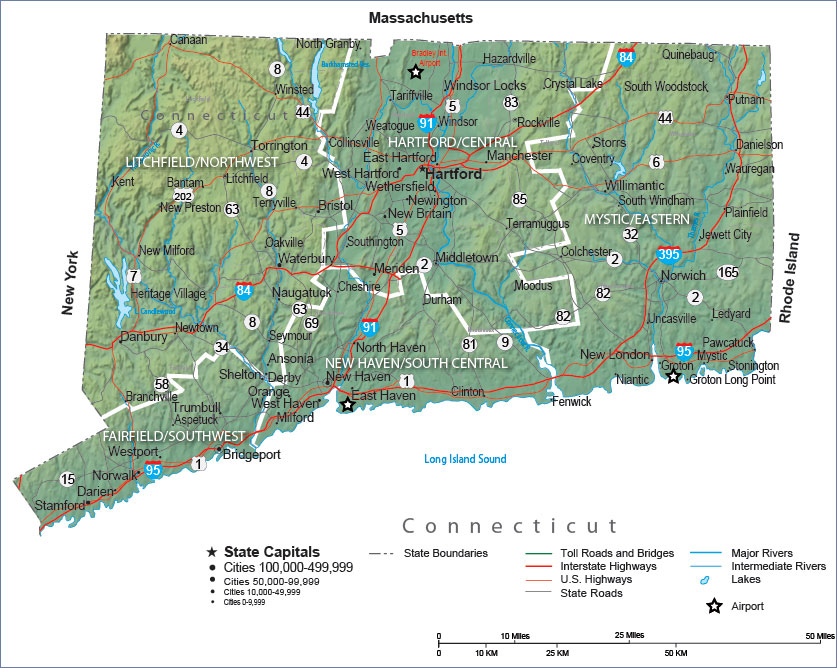

## **EDA 1: Boxplot of the Release Type and Gallons Spilled in the Incident**

In EDA 1, we mainly used `townrelease`, `releasetype`, and `quangallons` to explore the spill substances in the incidents. We will use a boxplot to visualize the differentiation of the release substances with the corresponding gallon spill. Then, we will further check the top ten cities that have a high frequency of spill incidents.

In [ ]:
# make a copy of the dataframe for eda
df_eda1 = df.copy()

In [ ]:
# only include some columns for EDA 1 to 2
df_eda1.drop(df_eda1.columns.difference(['date_reported_time_reported',
                               'townrelease', 'releasetype','quangallons',
                               'Date', 'Month', 'Hour', 'Day', 'Weekday',
                               'Weekday_Name', 'Weekend_Code'
                               ]), 1 , inplace=True)
df_eda1.head()

,date_reported_time_reported,townrelease,releasetype,quangallons,Date,Month,Hour,Day,Weekday,Weekday_Name
0,2021-01-03 19:50:00,Easton,1,5.0,2021-01-03,1.0,19.0,3.0,6.0,Sunday
1,2021-01-01 16:28:00,Middlefield,1,2.0,2021-01-01,1.0,16.0,1.0,4.0,Friday
2,2021-01-04 10:02:00,Guilford,3,2.0,2021-01-04,1.0,10.0,4.0,0.0,Monday
3,2021-01-04 13:25:00,WATERFORD,1,2.0,2021-01-04,1.0,13.0,4.0,0.0,Monday
4,2021-01-03 13:04:00,FRANKLIN,1,6.0,2021-01-03,1.0,13.0,3.0,6.0,Sunday


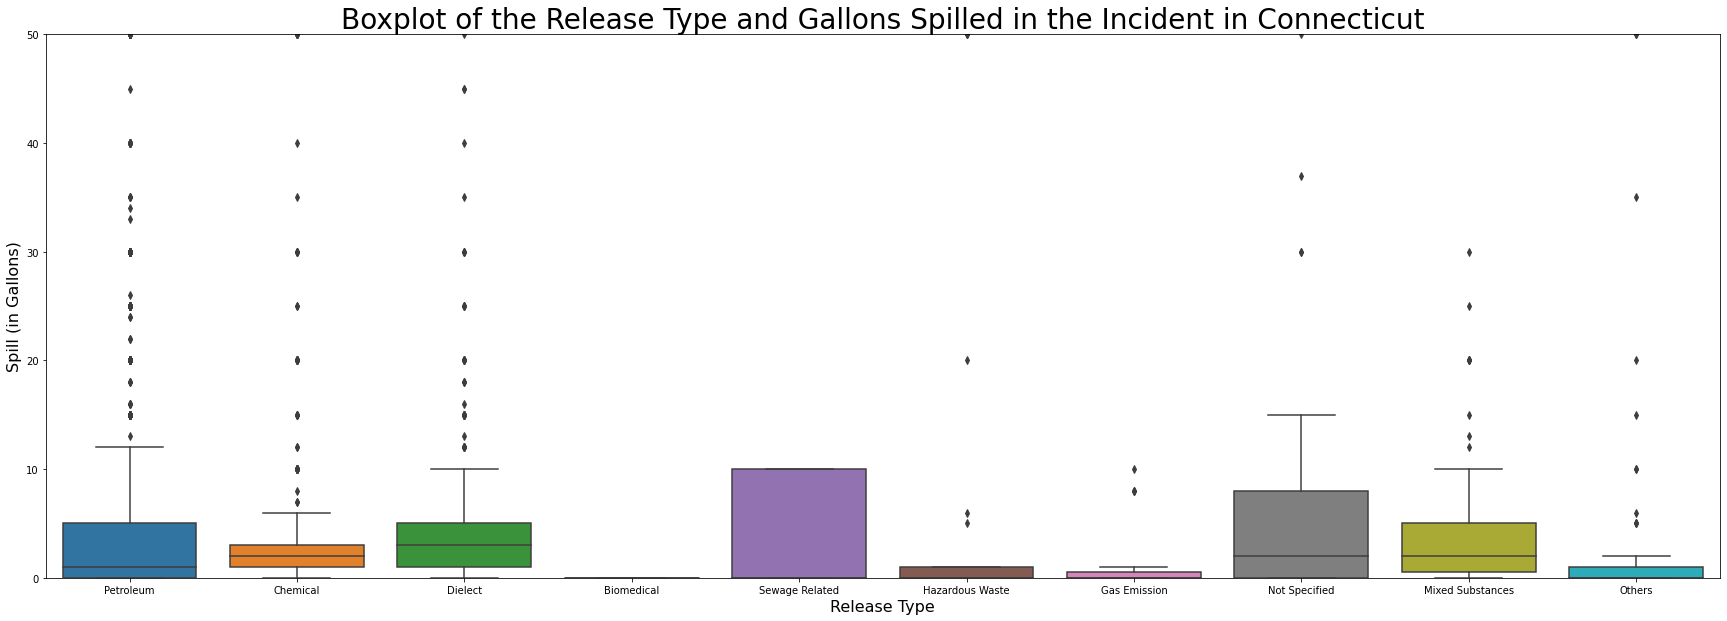

In [ ]:
# plot the boxplot
plt.figure(figsize=(30,10)) # set the figure size
plot1 = sns.boxplot(x="releasetype", y="quangallons", data=df_eda1, dodge=False) # plot the boxplot
plot1.set_xticklabels(['Petroleum','Chemical','Dielect','Biomedical','Sewage Related','Hazardous Waste','Gas Emission','Not Specified','Mixed Substances','Others']) # adjust the label on x axis
plt.title('Boxplot of the Release Type and Gallons Spilled in the Incident in Connecticut', fontsize=28) # set the title for this plot
plot1.set_xlabel('Release Type', fontsize=16) # xlabel
plot1.set_ylabel('Spill (in Gallons)', fontsize=16) # ylabel
plot1.set_ylim([0, 50]) # adjust the y limit to have a better visualization
plt.show() # show the plot

**Conclusion:**

This plot shows that the most serious spill incidents in Connecticut. We can clearly see that the spill contains petroleum, chemical, and dielect in most of the serious incidents. However, the plot further reveals that the release type for most of the spill incidents is sewage-related. Overall, most of the incidents are very minor, except for some of the serious incidents. That is why we can see a lot of outliers in this plot.

## **EDA 2 - Bar Chart of Top Ten Cities with High Frequency of Spill Incidents**

Our second exploration was to find out the top 10 towns/cities that have reported high number of spill incidents. This will probably let us to next set of questions like,
* Are these cities located near coastal areas?
* Do they have high crime numbers, etc.?
* What actions can be taken to prevent them, etc.?

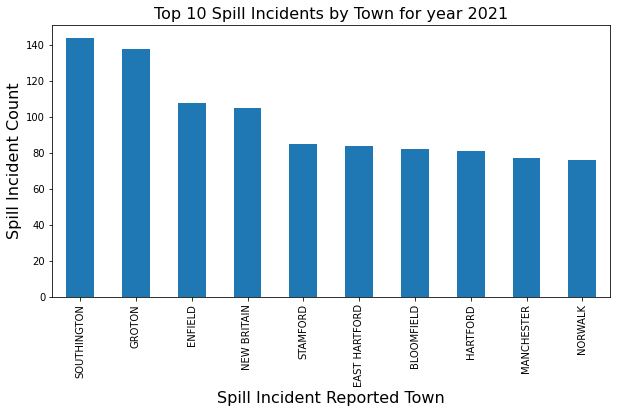

In [ ]:
df["case_count"] = 1 # adding one to each row to get total incidents
df["LocationNew"] = df["townrelease"].str.upper() # to help with merging in later steps we can converting to upper
dfplot2= df.groupby("LocationNew")["case_count"].sum().sort_values(ascending=False).head(10) #gives top 10 town names based on number of incident
dfplot2.plot(kind='bar',figsize=(10,5),legend=None) # plotting bar chart
plt.title('Top 10 Spill Incidents by Town for year 2021', fontsize=16) #title
plt.xlabel('Spill Incident Reported Town', fontsize=16) #xlabel
plt.ylabel('Spill Incident Count', fontsize=16) #ylabel
plt.show()

**Conclusion:**

This plot shows the top ten cities in Connecticut with a high number of spill incidents for the year of 2021. The city with the highest frequency of spill incidents is Southington. Enfield is the second city that has the highest frequency of spill incidents following Southington. When we look at the map above, most of the cities are near the Connecticut River and Long Island Sound.
The sewage spilling (that is shown in EDA 1) will end up in the rivers and streams that may cause a huge problem for water pollution and affect the marine biology and food chain. 

## **EDA3 -Bar Chart of the Spill Incident for Each Release Type in Southington**


Based on the results from EDA 2, we are going to explore the city, Southington, which has the high frequency of spill incidents. We want to see the breakdown of release type in the town. It could help the state of Connecticut to provide appropriate policies and regulations to the town and lower the frequency of spill incidents.

In [ ]:
# based on the result above, subset the data for Southington
plot3 = df_eda1[(df_eda1['townrelease'] == 'Southington')]
plot3 = plot3.groupby('releasetype').count() # group the frequency of the incidents
plot3.reset_index(inplace=True) # reset the index

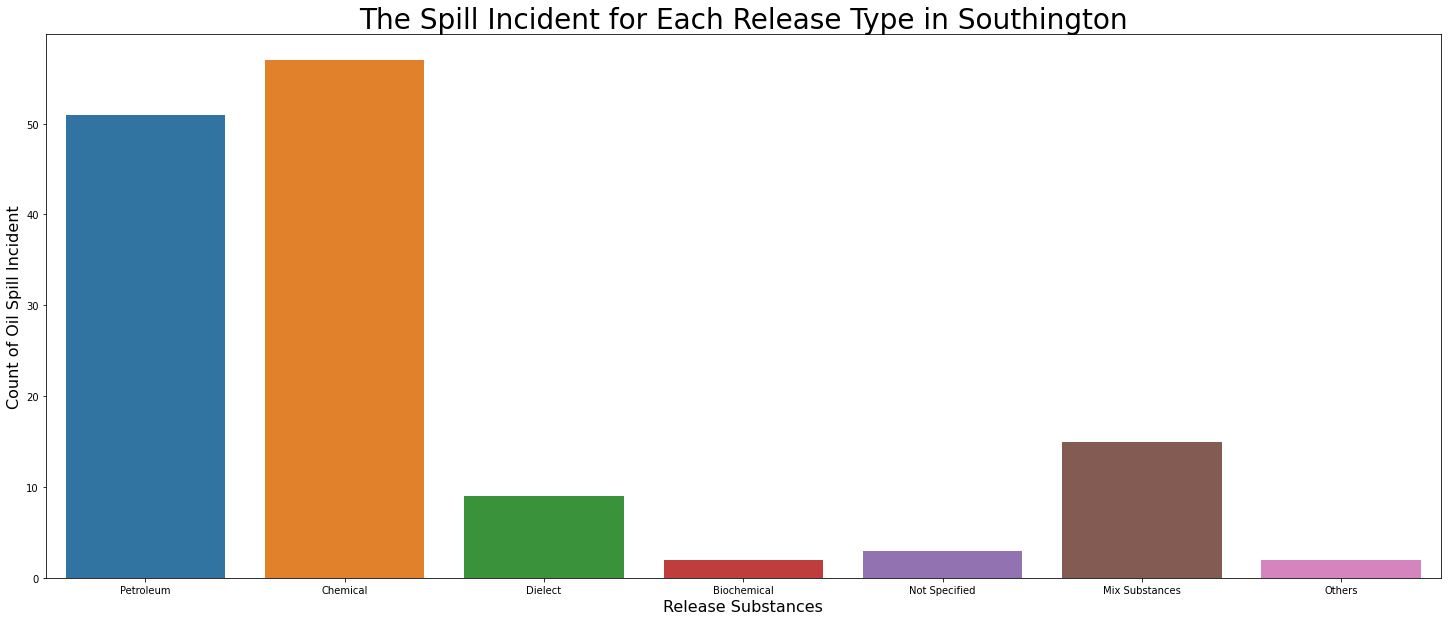

In [ ]:
plt.figure(figsize=(25,10)) # set the plot size
plot3 = sns.barplot(x='releasetype', y='quangallons', data=plot3, ci=None) # plot the bar plot
plot3.set_xticklabels(['Petroleum','Chemical','Dielect','Biochemical','Not Specified','Mix Substances','Others']) # adjust the label on x axis
plt.title('The Spill Incident for Each Release Type in Southington', fontsize=28) # set the title for this plot
plot3.set_xlabel('Release Substances', fontsize=16) # xlabel
plot3.set_ylabel('Count of Oil Spill Incident', fontsize=16) # ylabel
plt.show() # show plot

**Conclusion:**

After reviewing the results, we see seven types of release substances in Southington. This plot visualizes the count of spill incidents with the related release substances. Most of the incidents released Petroleum and Chemical substances in Southington. Petroleum (in terms of crude oil) is a mixture of hydrocarbons with heavy chemicals. It can harm habitats, disrupt the lifecycle of animals and result in erosion of shorelines. However, the chemical spill may pose different threats to humans, cause significant damage in the office or laboratory, and damage marine life with contamination.

##**EDA 4 - Bar Chart of Hour with the Highest Spill Incident in Connecticut**


After the exploration of `townrelease` and `releasetype`, we want to take a closer look at this time-series dataset. We did some feature engineering above to extract some time-related variables from reported time for our EDA. In EDA 4, we are going to check out the hours with the highest chance of spill incidents and the elapsed times in Connecticut.

### **EDA 4 - Subplot 1 - Hour vs Highest Spill Incident in Connecticut**

In [ ]:
plot4 = df_eda1.groupby('Hour').count().reset_index().sort_values('releasetype', ascending=False) # count the frequency of spill incident in each hour
plot4 = pd.DataFrame(plot4) # set in the dataframe


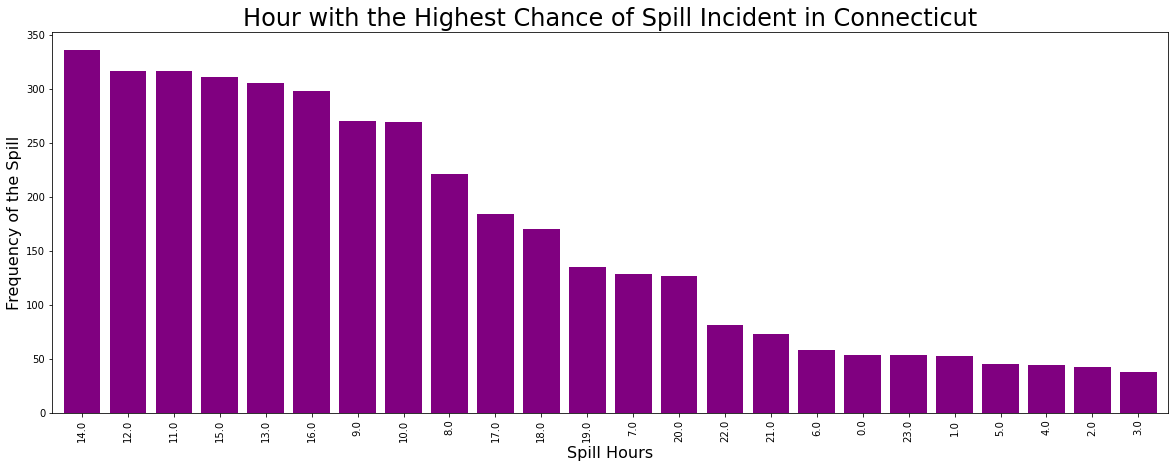

In [ ]:
plt.rcParams["figure.figsize"] = (20, 7) # set the plot size
plot4.plot.bar(x="Hour", y="releasetype", width = 0.8,color ="Purple",legend=False) # plot bar of the hour with the highest spill incident
plt.title('Hour with the Highest Chance of Spill Incident in Connecticut', fontsize=24) # set the title for this plot
plt.xlabel('Spill Hours', fontsize=16) # xlabel
plt.ylabel('Frequency of the Spill', fontsize=16) # ylabel
plt.show() # show plot

**Conclusion:**

This plot shows when the highest spill incident happened in Connecticut. We can see that the spill incidents are reported between 11 AM to 4 PM. This is because CT residents can notice any abnormal activities and report them quickly during these hours. During these peak hours, CT DEEP can assign crew members to act upon it immediately. 

### **EDA 4 -Subplot 2 - Bar Charts of the Elapsed Time at Day and Night**

This plot is based on elapsed time. Elapsed time is the time between release and reported time.
* Release time is when the actual incident happened. 
* Reported time is when the incident was reported.

In [ ]:
# subset the data set into day and night using the time conditions
day = df.copy()[(df["releasedatetime"].dt.hour >= 7) & (df["releasedatetime"].dt.hour < 19)]
print(day.shape) # check the length of lows and columns

night = df.copy()[(df["releasedatetime"].dt.hour >= 19) | (df["releasedatetime"].dt.hour < 7)]
print(night.shape) # check the length of lows and columns

(395, 27)
(3536, 27)


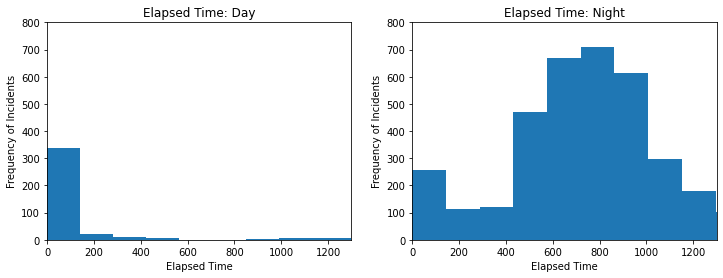

In [ ]:
plt.figure(figsize=(12, 4)) # set the plot size
plt.subplot(1, 2, 1) # set the first plot 
plt.hist(day["elapsed_time_min"])  # plot histgram of the elapsed time at day
plt.xlim(0, 1300) # set the x-axis range
plt.ylim(0, 800) # set the y-axis range
plt.title('Elapsed Time: Day') # set the title for this plot
plt.ylabel('Frequency of Incidents') # ylabel
plt.xlabel('Elapsed Time') # xlabel

# to compare day with night, make the ranges identical
plt.subplot(1, 2, 2) # set the second plot
plt.hist(night["elapsed_time_min"]) # plot histgram of the elapsed time at day
plt.xlim(0, 1300) # set the x-axis range
plt.ylim(0, 800) # set the y-axis range 
plt.title('Elapsed Time: Night') # set the title for this plot
plt.ylabel('Frequency of Incidents') # ylabel
plt.xlabel('Elapsed Time') # xlabel

plt.show() # show plot

**Conclusion:**

The spill incidents are more likely to happen at night and they are usually reported late, which may cause more serious problem to the environment. It seems that there should be some measures to reduce the cases and the elapsed time at night.

## **EDA 5 - Exploring the correlation between incidents and crimes or population**


For EDA5, we will be using our external datasets df_geo (latitude and longitude information) and df_pop (population and crime info) along with our main dataset.
Here we will be focussing only on our top 10 cities with high incidents to explore more. We had some gaps in the dataset, hence added some entries via code to give a full picture.

In [ ]:
df_eda2_tmp1 = df.groupby("LocationNew")["case_count"].sum().sort_values(ascending=False).head(10).reset_index() #incident count by towns
df_eda2_tmp2 = df.groupby("LocationNew")["quangallons"].sum().reset_index() #total quangallons by towns
df_eda2_tmp3 = df_eda2_tmp1.merge(df_eda2_tmp2,how='inner',on = ['LocationNew']) #combining the median and incident count datasets
df_eda2_tmp4 = df_eda2_tmp3.merge(df_geo,how='inner',left_on = ['LocationNew'],right_on =['Location']) # combining the dataset from above with geo data
df_eda2 = df_eda2_tmp4.merge(df_pop,how='inner',left_on = ['LocationNew'],right_on =['City']) # combining the dataset from above with pop data
df_eda2.head() #displaying first few rows

,LocationNew,case_count,quangallons,Location,Latitude,Longitude,CT,City,Population,Violent crime,Property crime,Law enforcement employees,Total crimes,"Crime rate per 1,000","Violent crimes per 1,000","Property crimes per 1,000","Law enforcement per 1,000"
0,SOUTHINGTON,144,1567.25,SOUTHINGTON,41.59,-72.87,49,SOUTHINGTON,43960,32,734,87,766,17.42,0.73,16.70,1.98
1,GROTON,138,1282.16,GROTON,41.33,-72.07,30,GROTON,29372,37,383,79,420,14.30,1.26,13.04,2.69
2,ENFIELD,108,533.75,ENFIELD,41.97,-72.59,38,ENFIELD,44574,55,687,106,742,16.65,1.23,15.41,2.38
3,NEW BRITAIN,105,526.01,NEW BRITAIN,41.68,-72.79,73,NEW BRITAIN,72630,310,2014,169,2324,32.00,4.27,27.73,2.33
4,STAMFORD,85,1009.75,STAMFORD,41.08,-73.55,46,STAMFORD,132007,218,2120,304,2338,17.71,1.65,16.06,2.30


### **EDA 5 - Subplot 1**

In the plot below we plotted the spill incidents count vs crime rate and also made the bubble size to represent the population of each city. The color represents each top 10 cities.

In [ ]:
import plotly.express as px #to plot

fig = px.scatter(df_eda2,x="Total crimes", y="case_count",
	         size="Population", color="City",
           labels={
                     "Total crimes": "Total crimes",
                     "case_count": "Incident Count",
                     "Population": "Population",
                     "City":"City"
                 },title = "Spill Incidents vs Total crimes by Population of Cities in Connecticut",
                 hover_name="City", size_max=60) # Incident count vs Total crimes, size of the bubble represt Population and color is by city
fig.show() # to display the chart


**Conclusion :** 

We can see that the incident counts are not directly related to crimes happening in the city. There could be towns with both crime and incidents high or low, or one of them being low vs high. However, with the size of the bubble, we see that there is a risk with the population. The higher the spill incidents in a city, it might effect more people and quicker prevention and correction actions should be taken.


### **EDA 5 - Subplot 2**

In this plot, we will be showing how the top cities are located in the connecticut area and if being located near the coastal area could be a factor for being effected by spill incidents more than the rest of the cities.

In [ ]:
# to install basemap library
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
lat = df_eda2['Latitude'].values # assigning to variable
lon = df_eda2['Longitude'].values # assigning to variable
population = df_eda2['Population'].values # assigning to variable
incidents = df_eda2['case_count'].values # assigning to variable

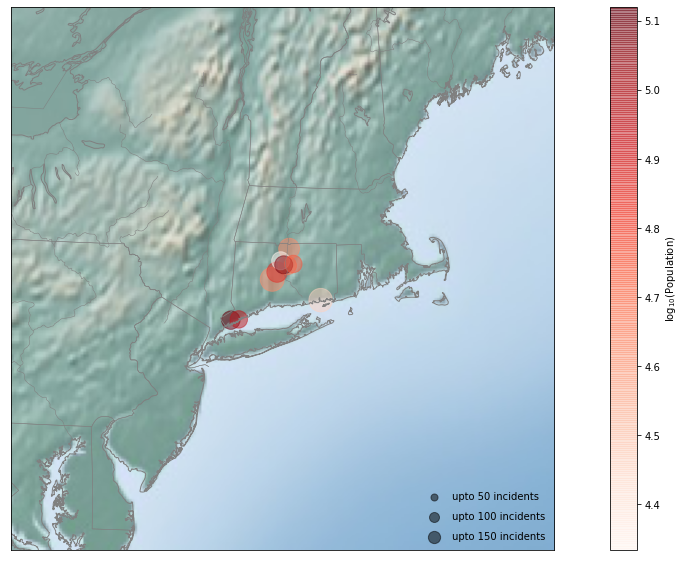

In [ ]:
## will be fixing this chart
# 1. Draw the map background
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution= 'h', 
            lat_0=41.599998, lon_0=-72.699997,
            width=.75E6, height=0.75E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawrivers(color='gray')
# 2. scatter city data, with color reflecting population
# and size reflecting spill incidents
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=incidents*4,
          cmap='Reds', alpha=0.5) # multiplying by 4 to make the size bigger and keeping it linear
# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm Population})$')
#plt.clim(3, 7)
# make legend with dummy points
for a in [50, 100, 150]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label='upto '+str(a) + ' incidents')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower right');

**Conclusion :**

Clearly some of the cities are very closely located to the coastal areas or rivers. Though this might not be the only factor, it could possibly be a factor and by taking good care of disposing the spills might be a possible solution.

# **Conclusion**

**Observations**

The sewage spilling (that is shown in EDA 1) will end up in the rivers and streams that may cause a huge problem like water pollution and affect the marine biology and food chain. This information could help the Environment Health and Safety (EHS) Department to offer proper disposal for these towns and avoid spilling and pollution. In addition, we also saw how being located near the river might be a factor as well. From our analysis we also find the elapsed time is high for incidents that happened at night. The incidents are usually reported during morning hours, primarily between 11 am and 4 pm.

**Recommendations**

As a next step in analysis, it is recommended to look at cities located near coastal areas with minimal spill incidents. Take a closer look at what are the different kinds of preventive and corrective actions taken by them. Try implementing to a few of the top 10 spill incidents cities and improve from the learnings.

# **Optimization** 

## **Optimization Question**

- We will assume that CT DEEP has assigned ten crews to address the incidents of the cities assigned to your group.
- For each city c in C, you will need to **compute the total number of gallons spilled by all incidents in c**. In the original dataset, you will find this information in the column ‘quangallons’. 
- Let us suppose that $G_c$ gallons spilled in all city c, and let us assume that $X_c$ crews were assigned to city c. Then, the repair time of all incidents in c is $\frac{G_c}{X_c}$, i.e., more crews solve the incidents faster.
- **Your objective is to assign the crews to the cities to handle the incidents as quickly as possible using the Brute-Force method**. You will consider two different scenarios, i.e., you will create two models, one for each of the problems below:
  - Identify an assignment of crews to cities that minimizes the sum of the repair times, given by $ \sum_{c \in C} \frac{G_c}{X_c}$
  - Identify an assignment of crews to cities that minimizes the maximum repair time among all cities in C, given by $max_{c \in C}$ $\frac{G_c}{X_c}$.

- Your solutions for both problems should satisfy the following constraints:
  - First, the number of crews available is ten, and each crew can only be assigned to one city. Therefore, if you assign six crews to a city, only four crews will be available for the other cities.
  - For each city, you must assign at least one crew. 
- What can you say about the two solutions you obtained for the problem? What would be your recommendation for CT DEEP?
 

## Data Preparation

The dataset that we used for the Optimization problem is the CT Spill Incident data which has data for the month of August and September 2021 (only top 1000 rows).

* Dataset - https://data.ct.gov/Environment-and-Natural-Resources/Spill-Incidents/wr2a-rnsg
* Drive Source - https://drive.google.com/file/d/1cCQpN5Y6Jh3cavFJdWTZaMnbJ42hWERK/view?usp=sharing

In [ ]:
# Step 1: copy & paste the shared link you will get from Google Drive
URL = 'https://drive.google.com/file/d/1cCQpN5Y6Jh3cavFJdWTZaMnbJ42hWERK/view?usp=sharing'

# Step 2: copy & paste the command below (this part of the command is fixed)
fixed_path = 'https://drive.google.com/uc?export=download&id='

# Step 3: Extract the file ID from the URL (this part of the command is fixed)
file_path = URL.split('/')[-2]

# Retrieve the json data and build a dataframe
opt = pd.read_json(fixed_path + file_path)

# Number of lines and columns
print(opt.shape) # To know the shape of the array
print(opt.info()) # To print concise summary of the array
opt.head() # Display of top 5 rows
opt

(1000, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         1000 non-null   int64  
 1   caseno                       1000 non-null   int64  
 2   assignedto                   1000 non-null   object 
 3   date_reported_time_reported  1000 non-null   object 
 4   releasedatetime              1000 non-null   object 
 5   townrelease                  999 non-null    object 
 6   stateofrelease               1000 non-null   object 
 7   reportedby                   999 non-null    object 
 8   representing                 1000 non-null   object 
 9   repstate                     1000 non-null   object 
 10  location                     999 non-null    object 
 11  releasetype                  1000 non-null   object 
 12  releasesubstance             997 non-null    object 
 13  quangall

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,location,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs,emergencymeasures,waterbody,actions,causeinfo,mediainfo,waterbodiesaffected,discharger,responsibility,repstreet,reptown,repzip
0,2021,202104328,NO Response,2021-10-03T20:56:00.000,2021-10-03T20:00:00.000,Brookfield,CT,Ken,Eversource,CT,3 Cherokee Drive,dielect,Transformer Oil - PCBs >2 ppm,< 5.00,0.00,0,0,0,Clean Harbors contracted to clean.,None,Contracted,"MV Accident, and Trans/Capac.",Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,202104327,NO Response,2021-10-03T19:59:00.000,2021-10-03T19:33:00.000,Bloomfield,CT,Bill,FD,CT,450 Woodland Ave.,petroleum,Gasoline,0.50,0.00,0,0,0,Sanded.,None,Sanded,MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,202104326,NO Response,2021-10-03T19:51:00.000,2021-10-03T00:00:00.000,Manchester,CT,fd,Self,CT,61 hills ave,petroleum,gasoline,2.00,0.00,0,0,0,sanded,NaN,Sanded,MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,202104325,NO Response,2021-10-03T18:05:00.000,2021-10-03T00:00:00.000,Woodbridge,CT,fd,fd,CT,hollow oak rd,"petroleum, and chemical",motor vehicle fluids,< 10.00,0.00,0,0,0,sanded,NaN,"Sanded, and Cleaned",MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,202104324,NO Response,2021-10-03T17:45:00.000,2021-10-03T14:50:00.000,Cheshire,CT,Kerry Komisky,Bozzutos,CT,400 Industrial Ave.,petroleum,Diesel,< 2.00,0.00,0,0,0,Cleaned.,None,Cleaned,Other (Unknown),Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021,202103333,NO Response,2021-08-11T12:45:00.000,2021-08-11T00:00:00.000,Greenwich,CT,gage,herbert recovery systems,CT,14 pierce rd,petroleum,#2 FUEL OIL,0.00,0.00,0,0,0,550g lust. No free product or ground water,NaN,Contracted,Inground Tank Failure,Ground Surface,NaN,jeff morgan,NaN,NaN,NaN,NaN
996,2021,202103332,NO Response,2021-08-11T12:41:00.000,2021-08-11T00:00:00.000,Berlin,CT,fd,fd,CT,mill st and middletown rd,chemical,ANTIFREEZE,2.00,0.00,0,0,0,sanded,NaN,"Sanded, and Cleaned",MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
997,2021,202103331,"SCALORA, RICH",2021-08-11T12:36:00.000,2021-08-11T00:00:00.000,Somers,CT,tolland dispatch,sfd,CT,22 hamden road,dielect,pcb less than 5ppm tranformer oil,0.00,0.00,0,0,0,contents of trasnformer on ground from mva,NaN,Other (speedy dry),"Container Failure, and MV Accident",Ground Surface,NaN,unk,NaN,NaN,NaN,NaN
998,2021,202103330,NO Response,2021-08-11T12:26:00.000,2021-08-11T00:00:00.000,Canton,CT,mike gaughan,eversource,CT,13 brookview circle,dielect,TRANSFORMER OIL,3.00,0.00,0,0,0,PCB < 2ppm,NaN,"Contained, and Contracted",Trans/Capac.,Ground Surface,NaN,saa,NaN,NaN,NaN,NaN


In [ ]:
# To detect missing values in an array
opt.isnull().sum() 

year                             0
caseno                           0
assignedto                       0
date_reported_time_reported      0
releasedatetime                  0
townrelease                      1
stateofrelease                   0
reportedby                       1
representing                     0
repstate                         0
location                         1
releasetype                      0
releasesubstance                 3
quangallons                      1
quanyards                        0
quanfeet                         0
quandrums                        0
quanlbs                          0
emergencymeasures              249
waterbody                      795
actions                         43
causeinfo                       18
mediainfo                        3
waterbodiesaffected            919
discharger                     688
responsibility                 950
repstreet                      920
reptown                        925
repzip              

## **Data Cleaning and Sampling**

In [ ]:
# Filtering the data for Cities assigned to Team 5. 
# Filter condition. Used Upper case to fetch Upper case values as well that are present in the data.
opt['townrelease'] = opt['townrelease'].str.upper()
df_cities = opt[(opt['townrelease'] == 'NAUGATUCK')|(opt['townrelease'] == 'DANBURY')|(opt['townrelease'] == 'MIDDLETOWN')]
print(df_cities.shape) # To print Shape of the array
df_cities.head() # Display of top 5 rows

(50, 29)


,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,location,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs,emergencymeasures,waterbody,actions,causeinfo,mediainfo,waterbodiesaffected,discharger,responsibility,repstreet,reptown,repzip
8,2021,202104320,"Keefe, Timothy",2021-10-03T04:47:00.000,2021-10-03T00:00:00.000,NAUGATUCK,CT,dispach,Self,CT,buckingham st and north chruch st,dielect,unknown pcb transformer oil,0.00,0.00,0,0,0,unknown amount - Eversource contacted,NaN,NaN,Trans/Capac.,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
12,2021,202104316,NO Response,2021-10-02T16:11:00.000,2021-10-02T00:00:00.000,NAUGATUCK,CT,fd,fd,CT,933 rubber ave,petroleum,gasoline,2.00,0.00,0,0,0,sanded,NaN,Sanded,MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
40,2021,202104288,"Garrachon, Julio",2021-09-30T17:42:00.000,2021-09-30T00:00:00.000,DANBURY,CT,anon,Self,CT,65 Winding Ridge Way,petroleum,hydraulic oil,0.00,0.00,0,0,0,unk amount of hydraulic oil spilled. Has not b...,NaN,Investigated,MV Accident,Ground Surface,NaN,Oakridge Waste and recycling,NaN,NaN,NaN,NaN
44,2021,202104284,"Garrachon, Julio",2021-09-30T15:01:00.000,2021-09-30T00:00:00.000,DANBURY,CT,colin murphy,eversource,CT,2 east ridge dr,dielect,transformer oil - unk pcb,50.00,0.00,0,0,0,NaN,NaN,Investigated,Trans/Capac.,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
127,2021,202104201,NO Response,2021-09-26T17:56:00.000,2021-09-26T00:00:00.000,DANBURY,CT,Michael Safranek,Candlewood Lake Authority,CT,2 shore Rd.,petroleum,SUNKEN VESSEL AT DOCK - POTENTIAL FOR RELEASE,0.00,0.00,0,0,0,FD boomed. Per 938 no response. Notification o...,Candlewood Lake,Contained,Sinking,Surface Water,NaN,NaN,NaN,NaN,NaN,NaN


There are many unnecessary variables to solve the optimization problem so let's subset the dataset.

In [ ]:
# Filtering data to show the required columns only i.e Town and Quantity in Gallons
df_opt = df_cities[['townrelease', 'quangallons']] # Filter condition
df_opt.sort_values('townrelease') # Sorting of data by Townrelease
df_opt.head() # Display of top 5 rows

,townrelease,quangallons
8,NAUGATUCK,0.00
12,NAUGATUCK,2.00
40,DANBURY,0.00
44,DANBURY,50.00
127,DANBURY,0.00


In [ ]:
# Validation of the 2 columns data for any missing values
print(df_opt.info()) # to print concise summary of dataset df_opt
df_opt.quangallons.value_counts() # to know distinct values present in the quantgallon column and their data format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 8 to 979
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   townrelease  50 non-null     object
 1   quangallons  50 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


0.00           19
1.00            7
2.00            5
5.00            3
0.50            3
3.00            2
<     10.00     2
0.25            2
4.00            1
<     15.00     1
~     20.00     1
<     20.00     1
~     10.00     1
<      1.00     1
50.00           1
Name: quangallons, dtype: int64

Amount in Gallons of substance spilled or found -- “0” indicates indicates zero or can indicate an unknown amount. The quantity can include the volume of contaminated soil or water combined with the spilled substance. Standard data qualifiers are symbols for greater than (>), less than (<), and approximate (~), though other symbols may be present, either intentionally or as typographic errors.

In [ ]:
# Let us convert approximate value to the exact maximum value (< 10 or ~ 10 => 10)
df_opt['quangallons'] = df_opt['quangallons'].str.replace('~','') # removing '~'
df_opt['quangallons'] = df_opt['quangallons'].str.replace('<','') # removing '<'
df_opt['quangallons'] = df_opt['quangallons'].str.strip() # remove spaces

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
# convert string values to numeric values
df_opt['quangallons'] = pd.to_numeric(df_opt['quangallons'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_opt['quangallons'].dtypes # validation of datatype change

dtype('float64')

## **Aggregation of Data for QuantGallons of Each City**

In [ ]:
df_new =  df_opt.groupby('townrelease')['quangallons'].sum() # grouping the data by column townrelease to obtain the total spill quantity
df_new

townrelease
DANBURY       85.50
MIDDLETOWN    52.25
NAUGATUCK     42.25
Name: quangallons, dtype: float64

## **Problem Statement 1: Minimizing the sum of the repair times**

Let us consider the Minimization function as Z and then based on the problem statement, we need to minimise the sum of repair times. 
Let us consider below parameters:
- d: the number of crews for Danbury
- m: the number of crews for Middletown
- n: the number of crews for Naugatuck

Repair Time for any city is given by GallonsSpilled/Number of Crews.

Therefore our objective function is:
 **MIN(Z) = GallonsSpilledofDanbury/d + GallonsSpilledofMiddletown/m + GallonSpilledof Naugatuck/n**

Below are the constraints based on the problem statement:
- **d + m + n = 10** , Total number of crews is
- **d, m, n >= 1** , at least one crew needs to be assigned to each city



In [ ]:
# Let us consider the Total_time as sum of repair time taken for all the cities when assigned with one crew
# This is the maximum time that will be taken to complete the task with one crew assigned and we will work to reduce this based on the Problem statement
total_time = df_new[0] + df_new[1] + df_new[2] 
best_d = 0 # Initialization of Best repair time for Danbury city as best_d
best_m = 0 # Initialization of Best repair time for Middletown city as best_m
best_n = 0 # Initialization of Best repair time for Naugatuck city as best_n

for d in range(1, 9): # Loop for number of crews for Danbury city from 1 to a max of 8 crews
  for m in range(1, 10-d):  # Loop for number of crews for Middletown city from 1 to a max of 8 based on the number of crewes left after assigning to Danbury 
    for n in range(1, 11-d-m):  # Loop for number of crews for Naugatuck city from 1 to a max of 8 based on the crew assigned to Danbury and Middletown
      if d+m+n > 10: # Condition for total number of crews cannot exceed 10 
        continue
      if df_new[0]/d + df_new[1]/m + df_new[2]/n < total_time: # Condition for minimizing the total repair time
        total_time = df_new[0]/d + df_new[1]/m + df_new[2]/n # Storing of minimized repair time in each iteration
        # Storing the Number of Crews obtained in each iteration as the best value
        best_d = d 
        best_m = m
        best_n = n
        # Storing the repair time of each city
        d1 = df_new[0]/d
        m1 = df_new[1]/m
        n1 = df_new[2]/n

# Print the Total Repair time, Reapir Time of each city and Crew numbers for each city
print("The number of crews for Danbury:", best_d)
print("The number of crews for Middletown:", best_m)
print("The number of crews for Naugatuck:", best_n)
print("The repair time for Danbury:",  d1)
print("The repair time for Middletown:",  m1)
print("The repair time for Naugatuck:",  n1)
print("The Total repair time for Danbury, Middletown and Naugatuck:", total_time)

The number of crews for Danbury: 4
The number of crews for Middletown: 3
The number of crews for Naugatuck: 3
The repair time for Danbury: 21.375
The repair time for Middletown: 17.416666666666668
The repair time for Naugatuck: 14.083333333333334
The Total repair time for Danbury, Middletown and Naugatuck: 52.87500000000001


## **Results and Conclusion**

From this approach of the Brute Force method, we aim at minimizing the total time taken for all the incidents altogether. We can conclude that the minimum total time that will be taken to repair all the 3 cities is 52.875 hours. For this to happen, we need to divide the 10 crews among the three cities as 4 crews to Danbury, 3 crews each to Middletown and Naugatuck.

With this distribution of crews, we can see that the number of hours of works required by the city is:
* Danbury: 21.375 hours
* Middletown: 17.417 hours
* Naugatuck: 14.08 hours

## **Problem Statement 2: Minimizing the maximum repair time among all cities in C**

The objective function for this Problem statement is:

 **MIN(Z) = GallonsSpilledofDanbury/d (Or) GallonsSpilledofMiddletown/m (Or) GallonSpilledof Naugatuck/n**

Where,
- d: the number of crews for Danbury
- m: the number of crews for Middletown
- n: the number of crews for Naugatuck

Constraints are:
- **d + m + n = 10**
- **d, m, n >= 1**



In [ ]:
#Let us consider the min_time as max of all the repair times among all cities which is considered when only one crew is assigned
min_time = max([df_new[0] , df_new[1] , df_new[2]])
d_best = 0 # Initialization of Best repair time for Danbury city as d_best
m_best = 0 # Initialization of Best repair time for Middletown as m_best
n_best = 0 # Initialization of Best repair time for Naugatuck as n_best

for d in range(1, 9): # Loop for number of crews for Danbury city from 1 to a max of 8 crews
  for m in range(1, 10-d):  # Loop for number of crews for Middletown city from 1 to a max of 8 based on the number of crewes left after assigning to Danbury 
    for n in range(1, 11-d-m):  # Loop for number of crews for Naugatuck city from 1 to a max of 8 based on the crew assigned to Danbury and Middletown
      if d+m+n > 10: # Condition for total number of crews cannot exceed 10 
        continue
      if (max([df_new[0]/d, df_new[1]/m, df_new[2]/n]) < min_time): # Condition for minimizing the max of repair time of each city
        min_time = max([df_new[0]/d, df_new[1]/m, df_new[2]/n]) # Storing of minimized repair time in each iteration
        # Storing the Number of Crews obtained in each iteration as the best value
        d_best = d
        m_best = m
        n_best = n
        #Storing the Repair time of cities
        x=df_new[0]/d
        y=df_new[1]/m
        z=df_new[2]/n
        sum=x+y+z

#Printing the Number of Crews for each city, Repair Time of each city and Total Repair Time
print("The number of crews for Danbury:", d_best)
print("The number of crews for Middletown:", m_best)
print("The number of crews for Naugatuck:", n_best)
print("The repair time for Danbury:", x)
print("The repair time for Middletown:", y)
print("The repair time for Naugatuck:", z)
print("The Total repair time for Danbury, Middletown and Naugatuck:", sum)
print("The Minimized value of Maximum repair time among all the cities is:", min_time)

The number of crews for Danbury: 5
The number of crews for Middletown: 3
The number of crews for Naugatuck: 2
The repair time for Danbury: 17.1
The repair time for Middletown: 17.416666666666668
The repair time for Naugatuck: 21.125
The Total repair time for Danbury, Middletown and Naugatuck: 55.641666666666666
The Minimized value of Maximum repair time among all the cities is: 21.125


## **Results and Conclusion**

With this approach of the Brute Force method, we aim at minimizing the maximum hours among the 3 cities. We can see that the total repair time, in this case, is 55.64 hours which the distribution of crew as 5 for Danbury, 3 for Middletown, and 2 for Naugatuck.
The Individual repair time for all the 3 cities is:

* Danbury: 17.1 hours
* Middletown: 17.41 hours
* Naugatuck: 21.125 hours

## **Recomendations**


1) We recommend the first method over the second if the distribution of 10 crews needs to be done carefully by taking the total repair time into consideration. This could be beneficial to the organization if they pay the employees based on Total work hours for all the incidents that happened in a day.

2) We would recommend the second method over the first if there are more incidents in a city with high spillage and needs immediate priority attention to have it repaired. This is because the second method focuses on reducing the Maximum hours spent to a city and thereby finding an optimal assignment of crews.

3) We recommend to avoid the constraint on at least 1 crew that needs to be assigned to each city. The reason being is there could be a situation when 2 cities have spill incidents, but the other city might not have any issues. So, assigning a crew to the city as back during the critical time would not be beneficial.

4) Also, it would be good to have a constraint on the release product because there would be cases where the number of quangallons at a city by an incident are less than another incident, but the effect of the release product spill is having high damage for a minute release. 

# **Conclusions**

1) We have learned on effectively creating a Brute Force algorithms. We understood what should be the Objective function and also to clearly list down the constraints that we have from a Problem Statement.

2) While trying to contrast and discuss the results of 2 Brute Force algorithms, we were able to come up with additional constraints and modification of objective function that would lead to a good optimized solution for a Problem.

3) Brute Force is a generic method that may be applied to a wide range of challenges. For minor and easy issues, the brute force strategy is excellent. But when we want to include additional constraints mentioned in the Recommendations to CT DEEP, we think Graphical Method or Simplex Method would be a good reaseach perspectives to move forward to acheive an Optimal solution easily.

4) After doing this project, we found that some time-series datasets can be dirty. We should select and use the useful and functional variables for some interesting visualizations in the exploratory data analysis. In order to enrich the original dataset, feature engineering for the timestamp and external datasets are required. It helps us to explore the relationship between the original dataset and external datasets to provide business values.

5) We learned and also overcome many challenges on how to visually represent various exploratory data analysis which would yield valuable insights. 



